In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
crypto_df = pd.read_csv(Path('crypto_data.csv'))

In [3]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
crypto_df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [5]:
crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]
crypto_df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [6]:
crypto_df = crypto_df.drop('IsTrading', axis = 1)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
#drop na values
crypto_df = crypto_df.dropna(axis = 0, how='any')
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
#sort mined
crypto_df = crypto_df[crypto_df['TotalCoinsMined']>0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
crypto_df = crypto_df.drop('CoinName', axis = 1)
crypto_df = crypto_df.drop('Unnamed: 0', axis = 1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [10]:
#to convert the remaining features with text values, Algorithm and ProofType, into numerical data
crypto_df['TotalCoinSupply'] = crypto_df['TotalCoinSupply'].astype(float)
crypto_df = pd.get_dummies(crypto_df)
crypto_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset added new columns, now there are 98 instead of 6 named after the algorithms. 

In [11]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler().fit_transform(crypto_df)
scaler

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [12]:
#pca steps
pca = PCA(n_components = 0.9)

In [13]:
pca_crypto = pca.fit_transform(scaler)
pd.DataFrame(pca_crypto)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-2.210782e-16,-6.883168e-16,2.282140e-15,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,7.921450e-17,-1.120989e-15,2.525930e-15,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,8.752073e-15,-2.234103e-14,-6.428405e-14,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-2.655003e-15,-1.002527e-14,-1.523596e-14,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-6.843734e-14,-1.448754e-13,-7.952353e-14,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,5.053451e-15,-2.187479e-11,-3.479650e-15,-0.851713,2.041159,3.560713,...,-2.195073e-16,-1.245385e-14,-1.888369e-14,1.081083e-14,-2.442418e-15,-1.163756e-14,1.668646e-14,2.036505e-14,-1.004832e-14,-3.803161e-15
528,-0.333144,1.032071,-0.590740,0.001399,8.834849e-15,3.721725e-12,-1.705276e-14,-0.007154,-1.320125,-0.052460,...,1.090840e-16,-7.745678e-16,1.846190e-15,-3.955569e-15,1.021953e-15,6.766213e-16,-1.874161e-15,-4.328686e-15,5.496276e-15,1.153312e-16
529,0.324349,-2.312308,0.421515,-0.001319,-5.674971e-15,-3.506871e-12,1.223719e-14,0.017309,0.161077,-0.047787,...,-1.977146e-14,-6.881003e-14,-5.028111e-14,1.778927e-14,4.078607e-14,1.826705e-14,4.864731e-14,4.926964e-14,2.745325e-14,1.569680e-15
530,-0.149364,-2.049336,0.412968,-0.001745,-6.510239e-15,-4.640471e-12,1.293676e-14,0.028954,0.544389,0.233373,...,-2.962943e-15,1.174696e-15,1.497439e-17,2.456472e-17,-1.957688e-15,1.116332e-15,1.132027e-15,3.635332e-15,-4.697815e-16,1.175227e-15


The number of features changed because there are now 74 rather than 98.

In [14]:
#Next, further reduce the dataset dimensions with t-SNE and visually inspect the results
tsne = TSNE(learning_rate = 45)
tsne_crypto = tsne.fit_transform(pca_crypto)

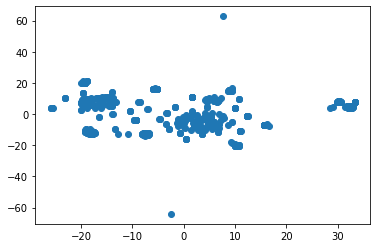

In [15]:
#scatter plot
x = tsne_crypto[:,0]
y = tsne_crypto[:,1]
plt.scatter(x, y)
plt.show()

There are distinct clusters here

In [16]:
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_crypto)
    inertia.append(km.inertia_)
    
elbow_data = {'k':k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

C:\Users\mgian\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,46979.075160
1,2,45909.857193
2,3,44845.490039
3,4,43778.700400
4,5,42518.641991
5,6,42110.072833
6,7,41512.802544
7,8,40100.342804
8,9,39210.120754
9,10,38316.717176


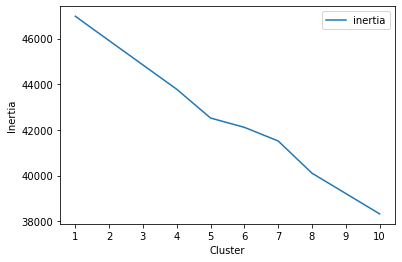

In [20]:
elbow_df.plot.line(x = 'k', y = 'inertia')
plt.xticks(range(1, 11))
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

Conclusion: It looks like there are two clusters. 